<a href="https://colab.research.google.com/github/RicardxJMG/Data-projects/blob/main/Data%20Science%20Projects/C%C3%A1ncer%20de%20Pulmon/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Predicción de cáncer pulmonar.</h1>

Los datos utilizados en este notebook fueron obtenido en [Kaggle](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data). Por otra parte, los datos utilizados también son mencionados en el siguiente artículo: [A new tool to predict lung cancer based on risk factors](https://pmc.ncbi.nlm.nih.gov/articles/PMC7044659/#bib25). En el articulo se mencion a que estos datos fueron obtenidos en [data.world](https://data.world/), pero desafortunadamente fue removido.

### Información del conjunto de datos.
---

Este conjunto de datos contiene información sobre pacientes con cáncer de pulmón, incluyendo su edad, género, exposición a la contaminación del aire, consumo de alcohol, alergia al polvo, riesgos ocupacionales, riesgo genético, enfermedad pulmonar crónica, dieta equilibrada, obesidad, estado de fumador, estado de fumador pasivo, dolor en el pecho, tos con sangre, niveles de fatiga, pérdida de peso, dificultad para respirar, sibilancias, dificultad para tragar, acropaquia (deformación de las uñas), resfriados frecuentes, tos seca y ronquidos. Al analizar estos datos, podemos obtener información sobre las causas del cáncer de pulmón y cómo tratarlo de la mejor manera.

**Información de las variables del conjunto de datos.**

- **Age**: La edad del paciente. (Numérico)
- **Gender**: El género del paciente. (Categórico)
- **Air Pollution**: El nivel de exposición a la contaminación del aire del paciente. (Categórico)
- **Alcohol use**: El nivel de consumo de alcohol del paciente. (Categórico)
- **Dust Allergy**: El nivel de alergia al polvo del paciente. (Categórico)
- **Occupational Hazards**: El nivel de riesgos ocupacionales del paciente. (Categórico)
- **Genetic Risk**: El nivel de riesgo genético del paciente. (Categórico)
- **Chronic Lung Disease**: El nivel de enfermedad pulmonar crónica del paciente. (Categórico)
- **Balanced Diet**: El nivel de dieta equilibrada del paciente. (Categórico)
- **Obesity**: El nivel de obesidad del paciente. (Categórico)
- **Smoking**: El nivel de tabaquismo del paciente. (Categórico)
- **Passive Smoker**: El nivel de fumador pasivo del paciente. (Categórico)
- **Chest Pain**: El nivel de dolor en el pecho del paciente. (Categórico)
- **Coughing of Blood**: El nivel de tos con sangre del paciente. (Categórico)
- **Fatigue**: El nivel de fatiga del paciente. (Categórico)
- **Weight Loss**: El nivel de pérdida de peso del paciente. (Categórico)
- **Shortness of Breath**: El nivel de dificultad para respirar del paciente. (Categórico)
- **Wheezing**: El nivel de sibilancias del paciente. (Categórico)
- **Swallowing Difficulty**: El nivel de dificultad para tragar del paciente. (Categórico)
- **Clubbing of Finger Nails**: El nivel de acropaquia (deformación de las uñas) del paciente. (Categórico)



## **Conociendo los datos.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

> Datos sin elementos nulos!


In [4]:
df.drop(columns = ['index', 'Patient Id'], inplace = True)

In [5]:
columns = list()
for col in df.columns:
    col = col.lower().replace(' ','_')
    columns.append(col)
df.columns = columns

In [6]:
df.describe().T.drop(columns = ['count'])

,mean,std,min,25%,50%,75%,max
age,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
gender,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
air_pollution,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
alcohol_use,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
dust_allergy,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
occupational_hazards,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
genetic_risk,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic_lung_disease,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
balanced_diet,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
obesity,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


## Análisis Exploratorio

In [7]:
sns.set_theme(style='ticks', palette='terrain')

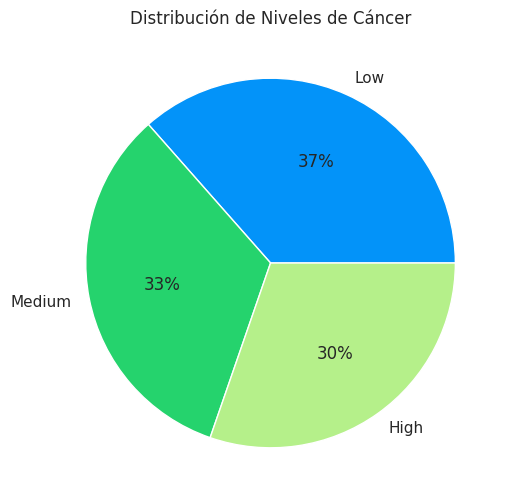

In [8]:
plt.figure(figsize=(8, 6))
plt.pie(df.level.value_counts(), labels=df.level.unique(), autopct='%.0f%%')
plt.title('Distribución de Niveles de Cáncer')
plt.show()

> Podemos ver que hay un balance entre los tres niveles de cáncer.

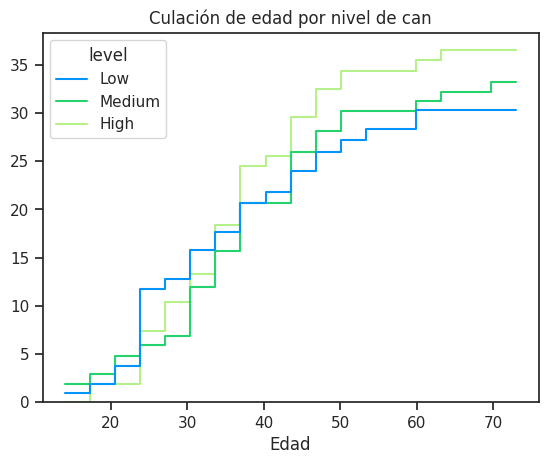

In [9]:
ax = sns.histplot(df, x='age',
                  hue = 'level', hue_order=['Low', 'Medium', 'High'],
                  cumulative = True,
                  fill= False, stat = 'percent',
                  element = 'step')
ax.set_title('Cumulación de edad por nivel de cáncer')
ax.set_ylabel('')
ax.set_xlabel('Edad')
plt.show()

> Podemos notar que no hay mucha variación de edad de los pacientes por el nivel de cáncer.

<ipython-input-10-d91e161ac7a1>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(['Hombre', 'Mujer'])


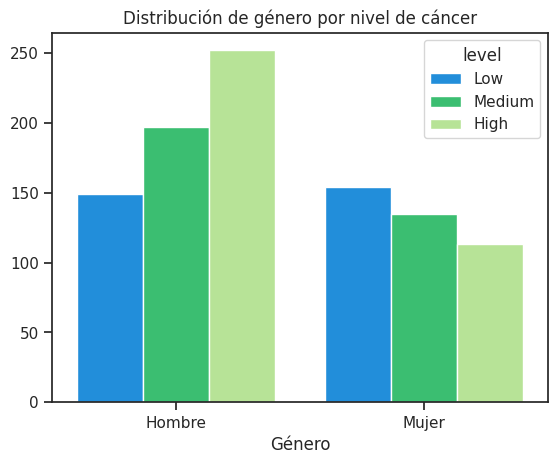

In [10]:
ax = sns.countplot(data = df, x = 'gender', hue = 'level', hue_order=['Low', 'Medium', 'High'])
ax.set_title('Distribución de género por nivel de cáncer')
ax.set_ylabel('')
ax.set_xlabel('Género')
ax.xaxis.set_ticklabels(['Hombre', 'Mujer'])
plt.show()

> La mayoria de los pacientes son hombres, siendo el nivel alto de cancer el de mayor cantidad.

In [11]:
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

Seleccionamos las variables que tengan un factor de riesgo mayor a 0.5, de acuerdo a la [tabla](https://pmc.ncbi.nlm.nih.gov/articles/PMC7044659/table/tbl2/) del articulo mencionado previamente.

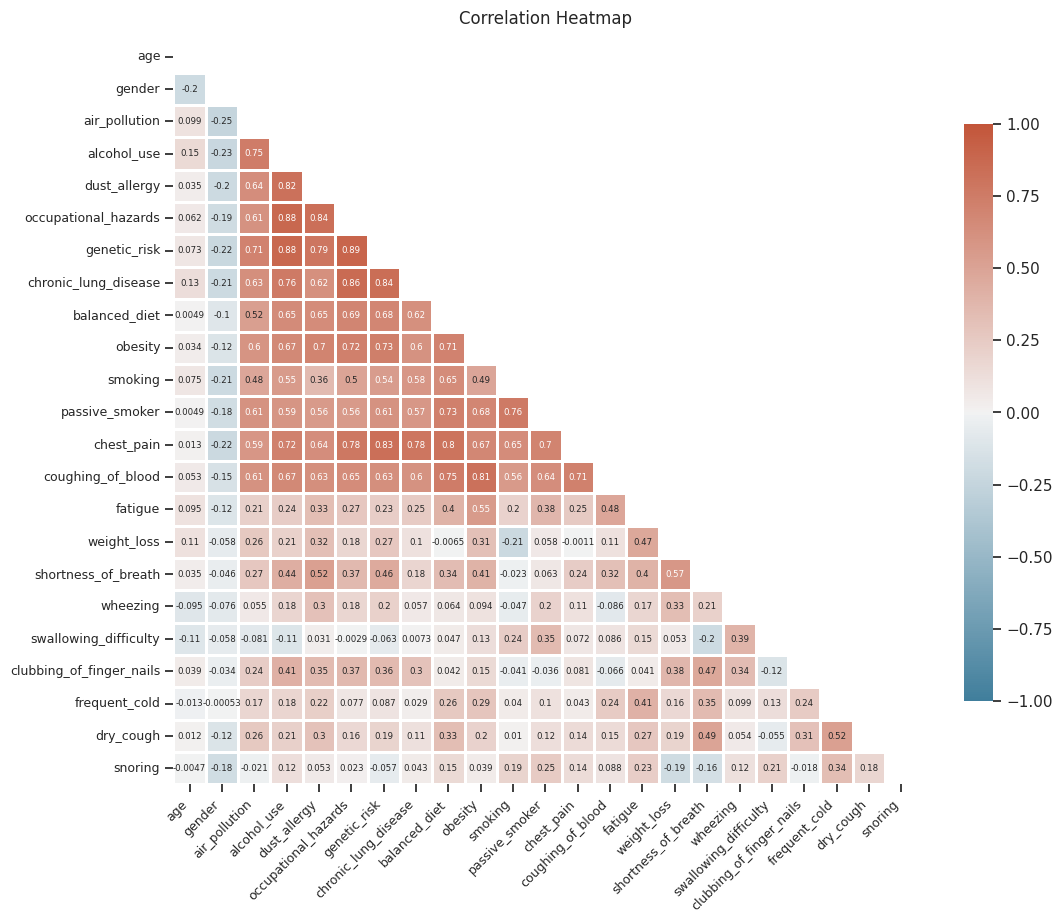

In [53]:
risk_factors = df.drop(columns = 'level').columns

corr = df[risk_factors].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1,vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .75},annot=True,
                      annot_kws={"size": 6.25})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize = 9);
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize = 9);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


> De la matriz de correlación podemos observar lo siguiente:
  - Todas las variables tienen correlación positiva.
  - La mayoria de las variables tienen una correlación positiva media o alta, a excepción de las variables *age* y *dry_cough*

# PCA (Análisis de componenetes principales)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df[risk_factors]
y = df.level

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cummulative_variance = pca.explained_variance_ratio_.cumsum()

print('Varianza explicada:\n\n',explained_variance.round(4))
print('\nVarianza cumulativa:\n\n',cummulative_variance.round(4))

Varianza explicada:

 [0.3958 0.1174 0.0877 0.066  0.0565 0.0529 0.0344 0.03   0.0263 0.0222
 0.0217 0.0182 0.0148 0.0123 0.0098 0.009  0.0068 0.005  0.0042 0.0037
 0.003  0.0014 0.001 ]

Varianza cumulativa:

 [0.3958 0.5132 0.6009 0.6669 0.7234 0.7762 0.8106 0.8406 0.867  0.8891
 0.9108 0.929  0.9438 0.956  0.9659 0.9749 0.9817 0.9867 0.9909 0.9945
 0.9975 0.999  1.    ]


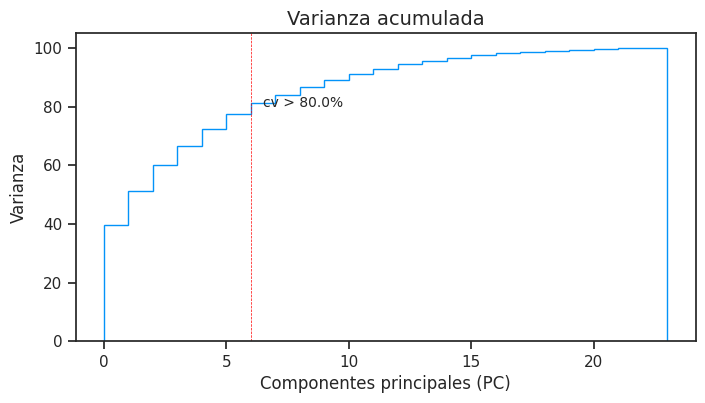

In [80]:
va_select = 0.8
va_value =  np.array(cummulative_variance)[np.where(cummulative_variance >= va_select)]
index = cummulative_variance.tolist().index(va_value[0])
plt.figure(figsize=(8, 4))
plt.stairs(cummulative_variance*100,label = 'Varianxa cumulativa')
plt.title('Varianza acumulada', fontsize = 14)
plt.xlabel('Componentes principales (PC)')
plt.ylabel('Varianza')
plt.axvline(index,linestyle = '--', color = 'r', lw = 0.5)
plt.annotate(f"cv > {100*va_select}%", xy = (index+0.5,va_select*100), fontsize = 10)
plt.show()

A partir de la componenete principal 5 se obtiene una varianza aculada mayor al 90%

In [81]:
pca = PCA(n_components = va_select)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca,
                      columns = ["PC{}".format(i+1) for i in range(X_pca.shape[1])])
df_pca['level'] = y

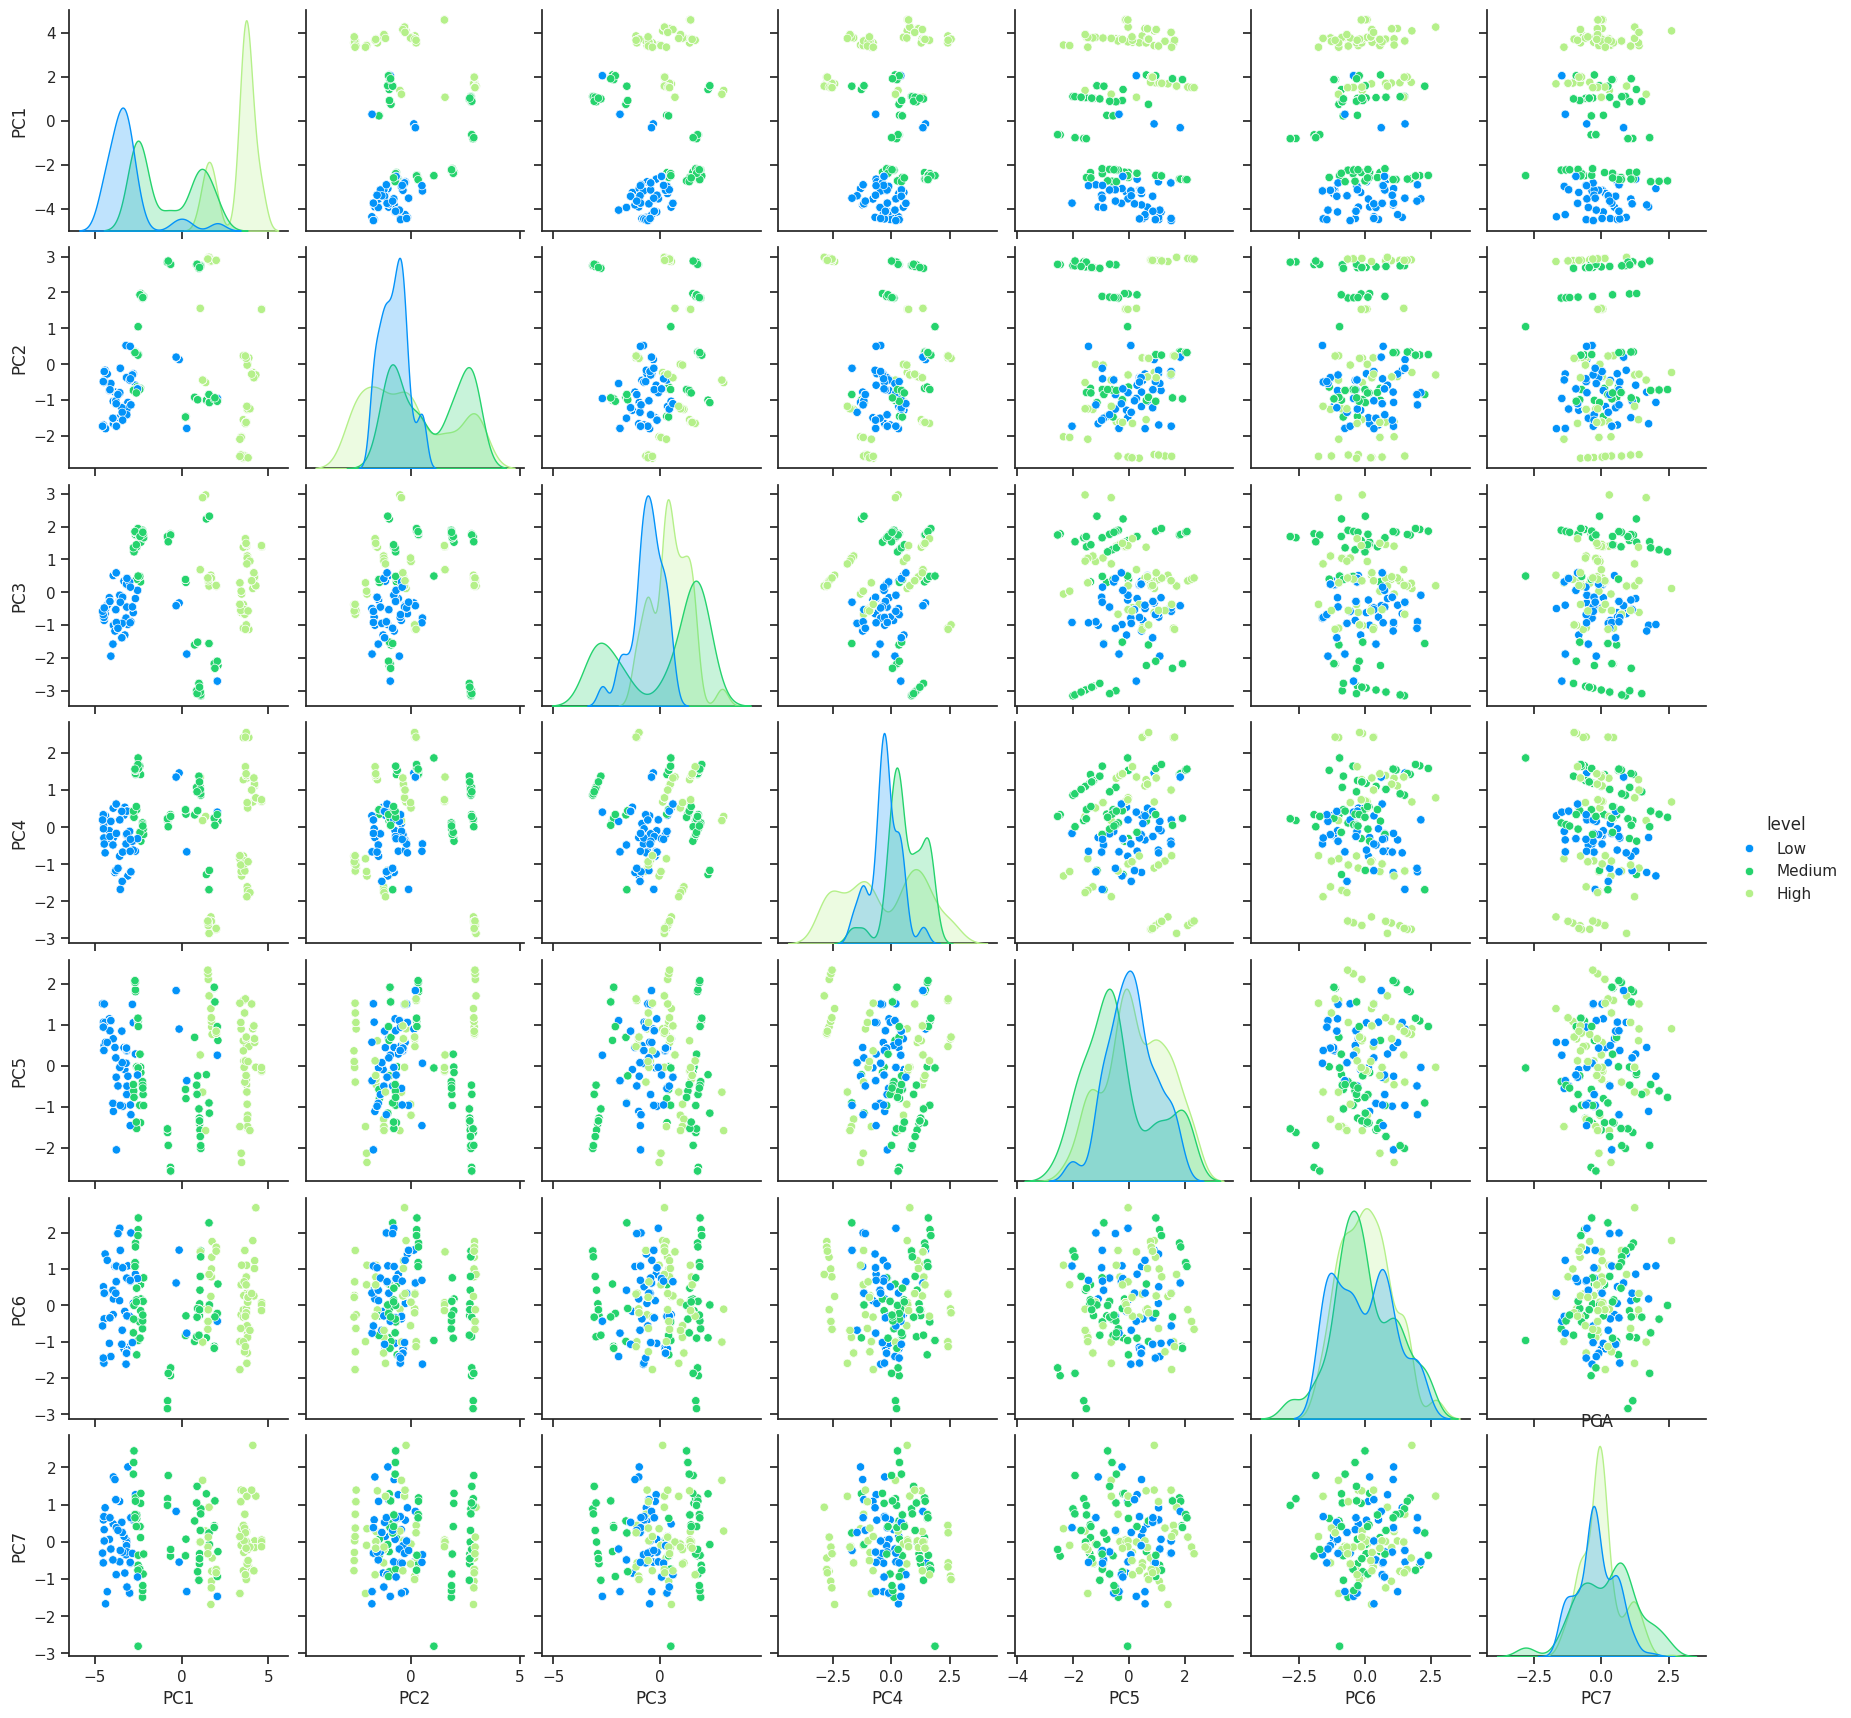

In [82]:
sns.pairplot(df_pca, hue = 'level')
plt.title('PCA')
plt.show()

Ahora, solo transformamos los datos de la variable dependiente.

In [83]:
level_map = {"Low": 0, "Medium": 1, "High": 2}
df_pca['level'] = df_pca.level.map(level_map)

df_pca.to_csv('df_pca.csv', index=False)

# Aplicando modelos de ML.

In [84]:
df_pca = pd.read_csv('df_pca.csv')
X_pca = df_pca.drop(columns = 'level')
y_pca= df_pca.level

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.25, stratify=y, random_state=42)

def modelos_sin_ajuste(X_train, X_test, y_train, y_test):
  models = {
      'Regresión Logística': LogisticRegression(multi_class = 'multinomial', random_state = 42),
      'Naive Bayes': GaussianNB(),
      'SVM': SVC(kernel = 'rbf', random_state = 42),
      'KNN': KNeighborsClassifier(n_neighbors=2),
      "Gradiente descendiente": GradientBoostingClassifier(random_state = 42)
  }
  results = {
      "model": [],
      "accuracy": [],
      "precision": [],
      "recall": [],
      "f1": [],
      "confusion_matrix": []
  }

  for name, model in models.items():
    if name == 'Naive Bayes':
      scaler = MinMaxScaler()
      model.fit(scaler.fit_transform(X_train), y_train)
      model_pred = model.predict(scaler.transform(X_test))
    else:
      model.fit(X_train, y_train)
      model_pred = model.predict(X_test)

    results["model"].append(name)
    results["accuracy"].append(np.round(accuracy_score(y_test, model_pred), 5))
    results['precision'].append(precision_score(y_test, model_pred, average='macro').round(5))
    results['recall'].append(recall_score(y_test, model_pred, average = 'macro').round(5))
    results['f1'].append(f1_score(y_test, model_pred, average = 'macro').round(5))
    results['confusion_matrix'].append(confusion_matrix(y_test, model_pred))

  results = pd.DataFrame(results)
  return results

In [86]:
def plot_confusion_matrix(results):
  names = results.model.unique()
  cms = results.confusion_matrix.values

  fig, axes = plt.subplots(1, len(cms), figsize=(15,3))
  fig.suptitle('Matriz de confusión', fontsize = 16, y = 1)
  fig.tight_layout()
  for i,(name, cm) in enumerate(zip(names, cms)):
    axes[i].set_title(name, fontsize = 11)
    sns.heatmap(cm, annot=True, cbar=False, fmt = 'd',
                xticklabels = ['Low', 'Medium', 'High'],
                yticklabels = ['Low', 'Medium', 'High'] if i==0 else [],
                cmap = 'Blues',
                ax = axes[i])
  fig.colorbar(axes[0].collections[0], ax=axes, shrink=0.75)
  plt.show()

In [87]:
results = modelos_sin_ajuste(X_train, X_test, y_train, y_test)
results.drop(columns = 'confusion_matrix')

,model,accuracy,precision,recall,f1
0,Regresión Logística,0.996,0.99603,0.99561,0.99580
1,Naive Bayes,0.956,0.95862,0.95542,0.95673
2,SVM,0.992,0.99216,0.99123,0.99159
3,KNN,1.000,1.00000,1.00000,1.00000
4,Gradiente descendiente,1.000,1.00000,1.00000,1.00000


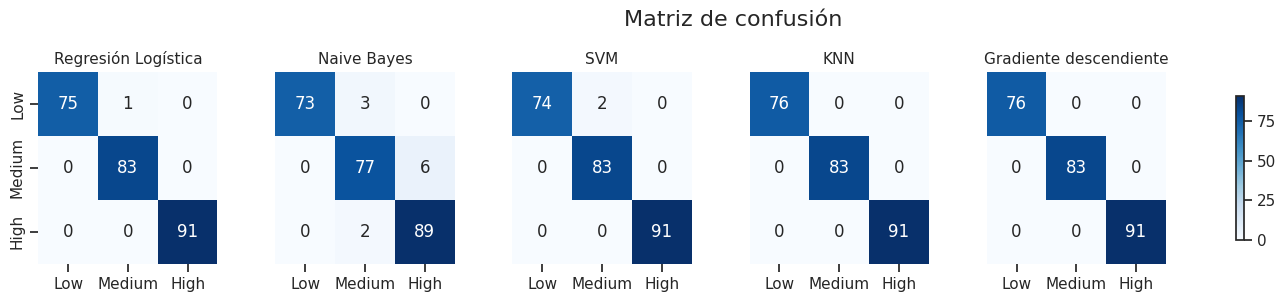

In [88]:
plot_confusion_matrix(results)

## Conclusiones

De acuerdo a la tabla anterior y a las matrices de confusión, tenemos que:

- Todos los modelos se ajustaron con todas las métricas mayor al 90%.
- El modelo de KNN obtuvo una exactitud de 100%, con sólo 2 vecindades.
- El modelo de Gradiente descendiente obtuvo una exactitud de 100%, incluso sin un ajuste en sus hiperparámetros.
- El modelo de Naive Bayes fue el que menos desempeño tuvo.

Pese a que los modelos de KNN y Gradiente Descendiente se ajustaron perfectamente, estos no se pueden tomar para realizar futuras predicciones, ya que pudo haber un sobreajuste, o bien, faltaron más datos para ajustar estos modelos con métricas razonables.